In [62]:
import numpy as np
import pandas as pd
df = pd.read_csv('./impute_test.csv')
df

,A,B,C,D
0,1,2.0,3.0,'Good'
1,4,NaN,6.0,'Good'
2,7,NaN,9.0,'Excellent'
3,10,11.0,12.0,NaN
4,13,14.0,15.0,'Excellent'
5,16,17.0,NaN,'Fair'
6,19,12.0,12.0,'Excellent'
7,20,11.0,23.0,'Fair'


In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['B', 'C']])
df[['B', 'C']] = imputer.transform(df[['B', 'C']])
df

,A,B,C,D
0,1,2.000000,3.000000,'Good'
1,4,11.166667,6.000000,'Good'
2,7,11.166667,9.000000,'Excellent'
3,10,11.000000,12.000000,NaN
4,13,14.000000,15.000000,'Excellent'
5,16,17.000000,11.428571,'Fair'
6,19,12.000000,12.000000,'Excellent'
7,20,11.000000,23.000000,'Fair'


In [64]:
from __future__ import annotations
from oop_functions.classifier_oop import *
from oop_functions.util_functions import *
from oop_functions.merge_dataset_functions import *
from oop_functions.analytics_oop import *

from xgboost import XGBClassifier

In [65]:
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)

In [66]:
year = 1
label = f'cancer_in_next_{year}_years'
source_df = resample_class(processed_data, label, 0, 20000)

In [67]:
experiment_data_helper = ExperimentDataHelper1(source_df, label, ['cancer_'])

In [68]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
data_util_lambdas = experiment_data_helper.train_test_split_util.split_kfold()
analytics_util = AnalyticsUtil(classifier, data_util_lambdas[0]()).fit()

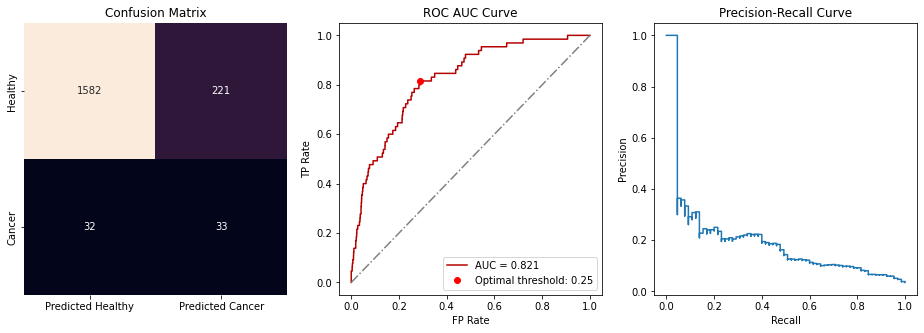

In [72]:
generate_report_util = analytics_util.get_report_generation_util()
generate_report_util.display_graph()

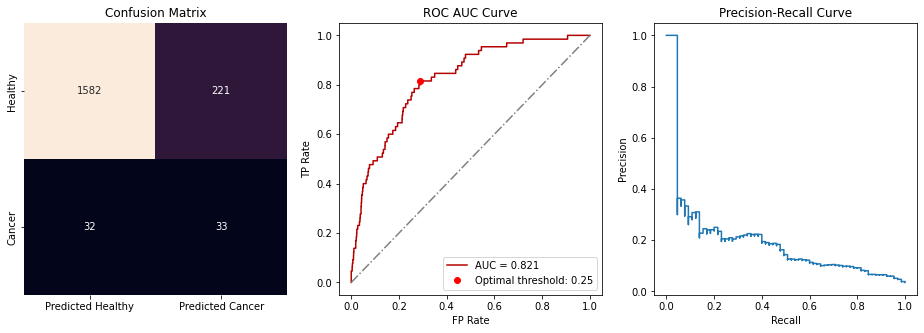

In [70]:
generate_report_util = analytics_util.get_report_generation_util()
generate_report_util.display_graph()